In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('covid_19_data.csv')

In [4]:
df.sample(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1481,1482,02/14/2020,NaN,Sri Lanka,2020-02-08T03:43:03,1.0,0.0,1.0
6840,6841,03/19/2020,NaN,Algeria,2020-03-19T16:13:36,87.0,9.0,32.0
24033,24034,05/12/2020,Henan,Mainland China,2020-05-13 03:32:26,1276.0,22.0,1254.0


## Convert
---

In [0]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [8]:
# Show all columns
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [9]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df.sample(2)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
20091,2020-04-30,Tanzania,480.0,16.0,167.0
27968,2020-05-22,Australia,29.0,0.0,29.0


In [19]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(4)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0


In [21]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [22]:
df2 = df_time['Deaths'].iloc[12:17]
df2 

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

## Pandas functions
---

In [27]:
# Diff returns difference between value "x" and value "x-1" in same column
df_diff = df_time.diff()
df_diff.head(3)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0


In [0]:
df_diff.fillna({
  'Confirmed': 1,
  'Deaths':  0,
  'Recovered': 0
}, inplace=True)

In [40]:
# Cumulative sum. The opposite of .diff()
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,99.0,1.0,2.0
2020-01-24,387.0,9.0,8.0
2020-01-25,884.0,25.0,11.0
2020-01-26,1564.0,39.0,24.0
...,...,...,...
2020-05-21,5101870.0,332907.0,1948711.0
2020-05-22,5210263.0,338143.0,2056615.0
2020-05-23,5309808.0,342080.0,2112157.0


## Resample
---

In [50]:
# Resample is for datetime-index DF's. Splits every some time. This example is every 7 days
# Works like groupby. You can apply some function to every sample.
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5024.0,114.0,79.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,25738.0,1102.0,16175.0
2020-03-11,78586.0,3643.0,16436.0
2020-03-18,220794.0,10710.0,26859.0


In [52]:
# Every Week on Sunday
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,1564.0,39.0,24.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,21464.0,807.0,17979.0
2020-03-15,57612.0,2637.0,15339.0
2020-03-22,169675.0,8183.0,21209.0


In [53]:
# Monthly sample
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9371.0,196.0,194.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2238215.0,112844.0,1216985.0


## Na's
---

In [0]:
# Min_count is min num of rows that will sum. If not will show NaN
df_cum = df_time.resample('12h').sum(min_count=1)

In [59]:
# df_cum.fillna(method='bfill').equals(df_cum.bfill()) == True
# Fills Na's with next value
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-05-23 00:00:00,5310362.0,342097.0,2112185.0
2020-05-23 12:00:00,5407613.0,345059.0,2168563.0
2020-05-24 00:00:00,5407613.0,345059.0,2168563.0


In [60]:
# Fills Na's with previous value
df_cum.ffill() 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-05-23 00:00:00,5310362.0,342097.0,2112185.0
2020-05-23 12:00:00,5310362.0,342097.0,2112185.0
2020-05-24 00:00:00,5407613.0,345059.0,2168563.0


In [0]:
df_cum = df_cum.interpolate()

## Grouping by time series
---

In [63]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
df_cum.reset_index(inplace=True)
df_cum.sample(2)

,ObservationDate,Confirmed,Deaths,Recovered,rate
231,2020-05-16 12:00:00,4673844.0,313483.0,1713580.0,0.932928
133,2020-03-28 12:00:00,690416.5,32288.5,144242.5,0.953233


In [72]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq='M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.932117


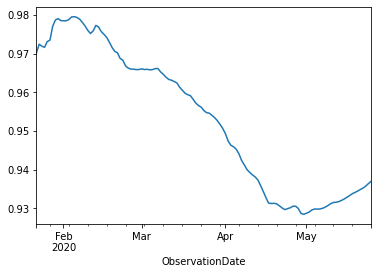

In [74]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq='1d'))['rate'].mean()
sr.plot()

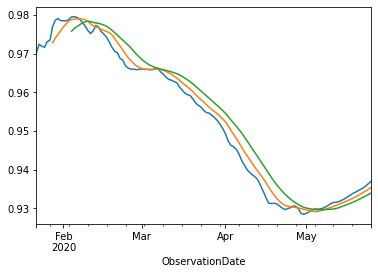

In [84]:
sr.plot(label='Original')
sr.rolling(window=7).mean().plot(label='7 days')
sr.rolling(window=14).mean().plot(label='14 days')

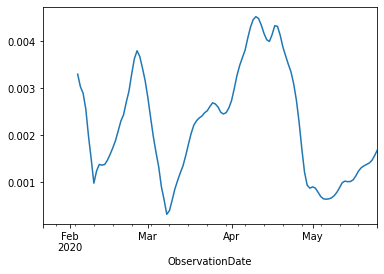

In [87]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

## Visualization
---

In [97]:
df.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(15).index

Index(['UK', 'Italy', 'US', 'France', 'Spain', 'Brazil', 'Belgium', 'Germany',
       'Iran', 'Netherlands', 'Mexico', 'Mainland China', 'Turkey', 'India',
       'Canada'],
      dtype='object', name='Country/Region')

In [0]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()

In [0]:
df_mx =  df_time.loc['Mexico']

In [118]:
df_mx.sample(2)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-28,1.0,0.0,0.0
2020-03-20,164.0,1.0,4.0


### Line

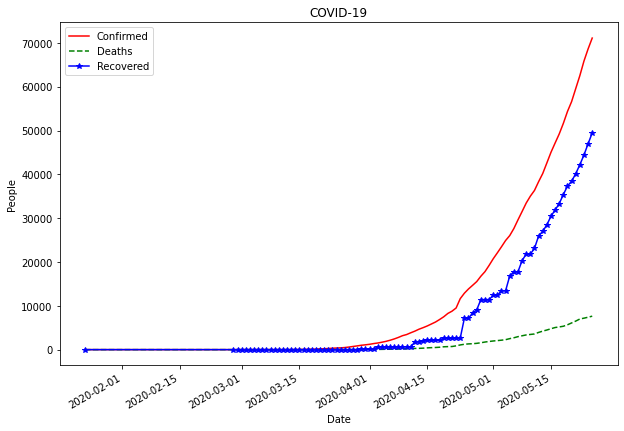

In [125]:
df_mx.plot(figsize=(10, 7), title='COVID-19', style=['r-', 'g--', 'b-*'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [0]:
df_monthly = df_mx.resample('M').max()

### Bar

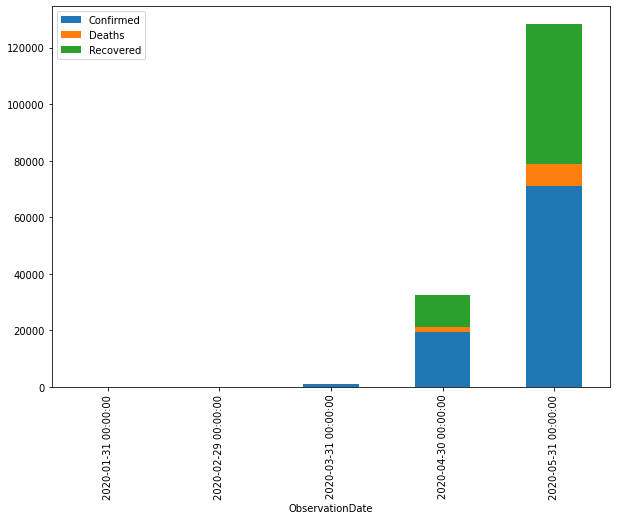

In [132]:
df_monthly.plot(figsize=(10, 7), kind='bar', stacked=True)

In [133]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,4.0,0.0,0.0,4.0
2020-03-31,1094.0,28.0,35.0,1031.0
2020-04-30,19224.0,1859.0,11423.0,5942.0
2020-05-31,71105.0,7633.0,49452.0,14020.0


### Pie

No handles with labels found to put in legend.


[]

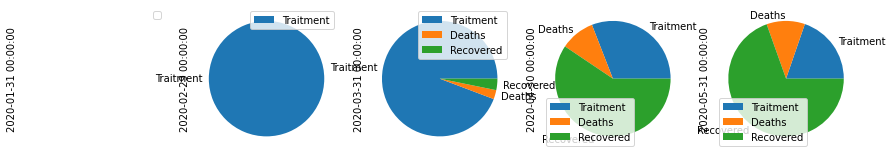

In [141]:
df_monthly[['Traitment', 'Deaths', 'Recovered']].T.plot(figsize=(15, 9), kind='pie', subplots=True)
plt.plot()

### Histogram

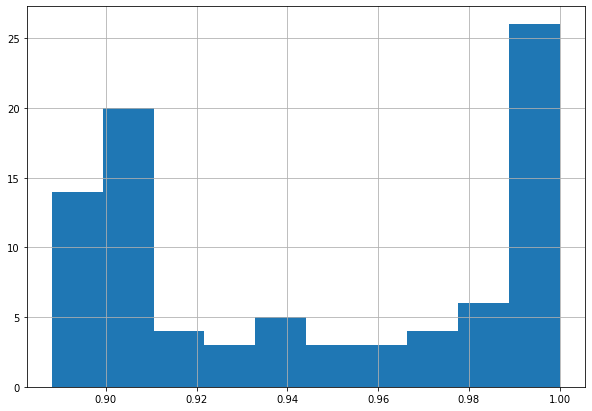

In [143]:
df_mx['rate'] = 1 - df_mx['Deaths']/df_mx['Confirmed']
df_mx['rate'].hist(figsize=(10, 7), bins=10)

### KDE

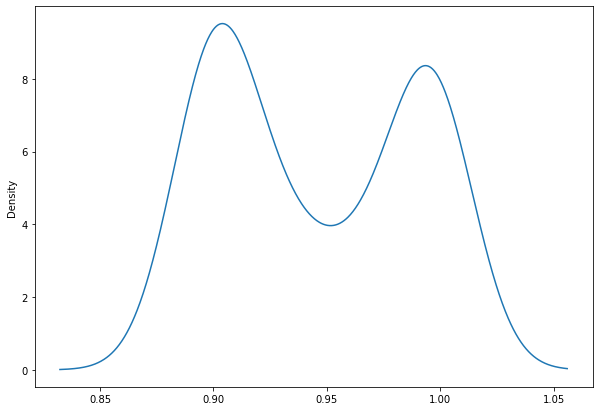

In [145]:
df_mx['rate'].plot(kind='kde', figsize=(10, 7))